In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. temperature gets warmer as you get closer to the equator as expectecd. 
2. humidity seems to be more random and does not correlate stongly to locations near the equator like temperature does. 
3. cloudiness and wind speed also seems to be weakly correlated with location to the equator. further research and analysis would be neccesary to find correlation geographically.

In [3]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from api_keys import weather_api_key
from citipy import citipy

output_data_file = "output_data/cities.csv"



## Generate Cities List

In [4]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#emptylists
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

#loop through cities
for city in cities:

    #JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

    #error handling with try/except statement
    try:
        city_id = response_json['id']
        city_id_list.append(city_id)   
        city_name = response_json['name']
        city_name_list.append(city_name)
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        lng = response_json['coord']['lon']
        lng_list.append(lng)
        lat = response_json['coord']['lat']
        lat_list.append(lat)
        temp = response_json['main']['temp']
        temp_list.append(temp)
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)
        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)

        print(f"City Name: {city}, City ID: {city_id}")

    except:
        print("That record does not exist, searching for next record...")



City Name: geraldton, City ID: 2070998
City Name: binga, City ID: 895057
City Name: chuy, City ID: 3443061
City Name: saint-augustin, City ID: 6137462
City Name: mount gambier, City ID: 2156643
That record does not exist, searching for next record...
City Name: yellowknife, City ID: 6185377
City Name: cape town, City ID: 3369157
City Name: lavrentiya, City ID: 4031637
City Name: santa rosa, City ID: 1687894
City Name: faanui, City ID: 4034551
City Name: iqaluit, City ID: 5983720
City Name: ilulissat, City ID: 3423146
City Name: renqiu, City ID: 1797181
City Name: mahebourg, City ID: 934322
City Name: kirksville, City ID: 5055787
City Name: nouakchott, City ID: 2377450
City Name: kalianget, City ID: 1641977
City Name: yanam, City ID: 1252795
City Name: lagoa, City ID: 3372964
City Name: kot diji, City ID: 1173302
City Name: karratha, City ID: 6620339
City Name: pilar, City ID: 3392126
City Name: kavieng, City ID: 2094342
City Name: alofi, City ID: 4036284
City Name: bubaque, City ID: 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat":lat_list, "Lng":lng_list, "Temp":temp_list, "Humidity": humidity_list, "Clouds": clouds_list, "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temp,Humidity,Clouds,Wind Speed
0,3628473,San Cristobal,VE,7.77,-72.22,84.20,62,40,8.05
1,5367788,Lompoc,US,34.64,-120.46,65.35,77,1,10.29
2,5106841,Albany,US,42.60,-73.97,72.23,65,4,3.69
3,3870282,Talcahuano,CL,-36.72,-73.12,51.80,93,75,3.36
4,3698304,Chimbote,PE,-9.09,-78.58,61.03,87,65,9.42


In [7]:
#output to csv
cities_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.describe()

,City ID,Lat,Lng,Temp,Humidity,Clouds,Wind Speed
count,5.890000e+02,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,2.743198e+06,20.513956,18.088727,65.857165,72.176570,49.349745,7.554177
std,1.635222e+06,33.153841,89.320279,14.007437,20.538235,37.304227,5.427040
min,5.700000e+04,-54.800000,-175.200000,25.950000,7.000000,0.000000,0.290000
25%,1.628884e+06,-7.050000,-58.650000,55.530000,62.000000,12.000000,3.360000
50%,2.271968e+06,22.920000,18.970000,67.030000,77.000000,48.000000,6.040000
75%,3.625710e+06,48.400000,99.830000,77.650000,88.000000,87.000000,10.290000
max,1.072286e+07,78.220000,179.320000,97.970000,100.000000,100.000000,34.830000


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

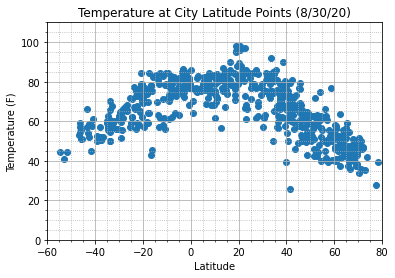

In [11]:
x_values = cities_df['Lat']
y_values = cities_df['Temp']

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.minorticks_on()
plt.grid(which="major", linestyle= '-')
plt.grid(which="minor", linestyle= ':')
plt.xlim(-60,80)
plt.ylim(0,110)
plt.title("Temperature at City Latitude Points (8/30/20)")
plt.show()


## Latitude vs. Humidity Plot

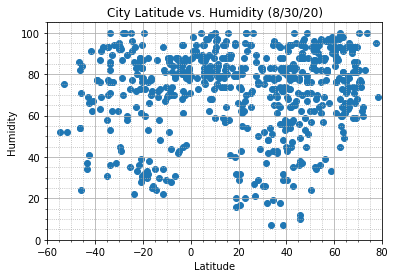

In [12]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.minorticks_on()
plt.grid(which="major", linestyle= '-')
plt.grid(which="minor", linestyle= ':')
plt.xlim(-60,80)
plt.ylim(0,105)
plt.title("City Latitude vs. Humidity (8/30/20)")
plt.show()


## Latitude vs. Cloudiness Plot

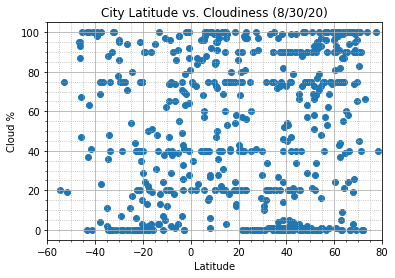

In [13]:
x_values = cities_df['Lat']
y_values = cities_df['Clouds']

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloud %")
plt.minorticks_on()
plt.grid(which="major", linestyle= '-')
plt.grid(which="minor", linestyle= ':')
plt.xlim(-60,80)
plt.ylim(-5,105)
plt.title("City Latitude vs. Cloudiness (8/30/20)")
plt.show()


## Latitude vs. Wind Speed Plot

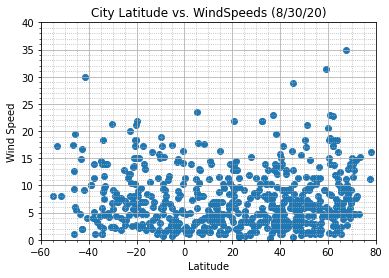

In [14]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.minorticks_on()
plt.grid(which="major", linestyle= '-')
plt.grid(which="minor", linestyle= ':')
plt.xlim(-60,80)
plt.ylim(0,40)
plt.title("City Latitude vs. WindSpeeds (8/30/20)")
plt.show()


## Linear Regression

In [15]:
northern_hem_df = cities_df[cities_df["Lat"] > 0]
southern_hem_df = cities_df[cities_df["Lat"] < 0]
southern_hem_df

,City ID,City,Country,Lat,Lng,Temp,Humidity,Clouds,Wind Speed
3,3870282,Talcahuano,CL,-36.72,-73.12,51.80,93,75,3.36
4,3698304,Chimbote,PE,-9.09,-78.58,61.03,87,65,9.42
5,3445026,Vila Velha,BR,-20.33,-40.29,74.16,78,3,14.99
7,6201424,Mataura,NZ,-46.19,168.86,59.22,54,95,12.57
10,2101169,Aitape,PG,-3.14,142.35,86.34,61,33,2.57
...,...,...,...,...,...,...,...,...,...
567,974719,Molteno,ZA,-31.40,26.36,55.81,37,0,4.21
570,155263,Mahonda,TZ,-6.45,39.47,75.67,78,1,11.65
575,3924895,Plácido de Castro,BR,-10.34,-67.19,84.42,29,62,3.02
577,3395981,Maceió,BR,-9.67,-35.74,71.60,88,20,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
## There is a strong negative correlation between temperature and latitutde in the northern hemisphere as you get closer to the equator, the higher the temperature gets. 

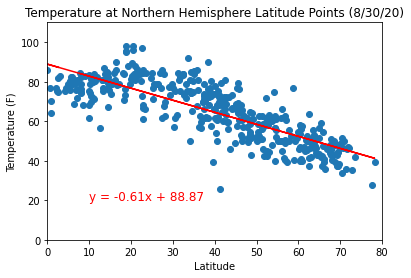

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,20), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(0,80)
plt.ylim(0,110)
plt.title("Temperature at Northern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/n_hem_lat_temp_regression.png") 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
## There is a strong positive correlation between temperature and latitutde in the southern hemisphere as you get closer to the equator, the higher the temperature gets. 


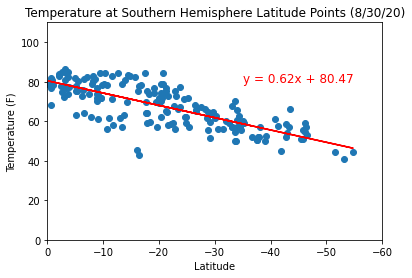

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35,80), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(0,-60)
plt.ylim(0,110)
plt.title("Temperature at Southern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/s_hem_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
## There is a weak negative correlation between the humidity and latitude points in the northern hemisphere, meaning the humidity does get higher closer to the equator but the correlation is very weak. 

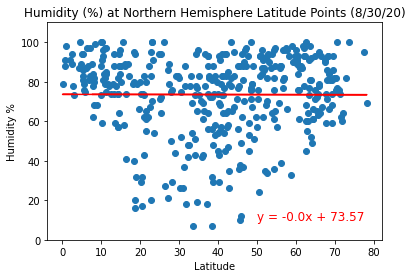

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.ylim(0,110)
plt.title("Humidity (%) at Northern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/n_hem_lat_humidity_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
## There is a weak positive correlation between the humidity and latitude points in the southern hemisphere, meaning the humidity does get higher closer to the equator but the correlation is very weak. 

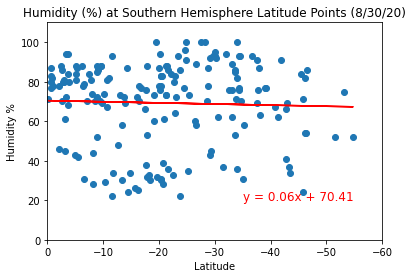

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35,20), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(0,-60)
plt.ylim(0,110)
plt.title("Humidity (%) at Southern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/s_hem_lat_humidity_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
## There is a weak positive correlation between cloudiness and latitudes in the northern hemishere. 

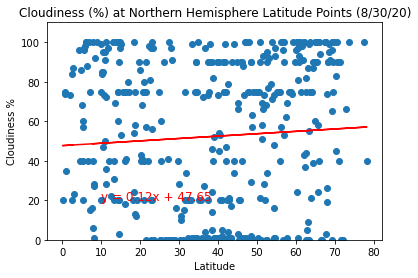

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,20), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.ylim(0,110)
plt.title("Cloudiness (%) at Northern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/n_hem_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
## There is a weak negative correlation between cloudiness and latitudes in the southern hemishere. 

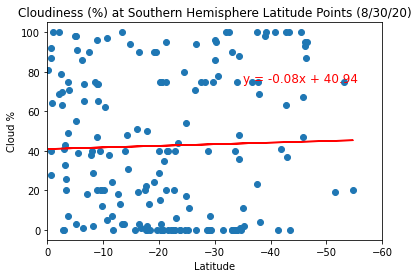

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35,75), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud %")
plt.xlim(0,-60)
plt.ylim(-5,105)
plt.title("Cloudiness (%) at Southern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/s_hem_lat_clouds_regression.png")

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
## There is a weak positive correlation between wind speed and latitudes in the northern hemisphere.

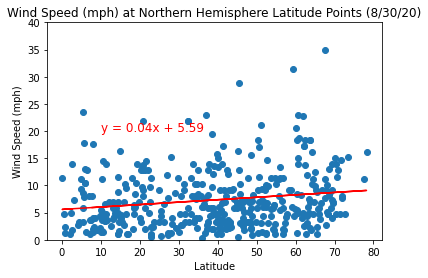

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,20), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.title("Wind Speed (mph) at Northern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/n_hem_lat_windspeed_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
## There is a weak negative correlation between wind speed and latitudes in the southern hemisphere.

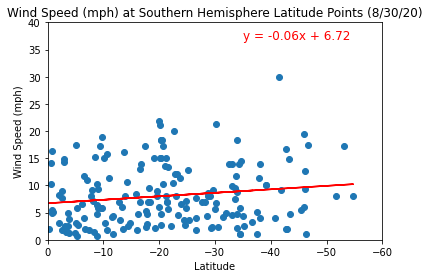

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35,37), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(0,-60)
plt.ylim(0, 40)
plt.title("Wind Speed (mph) at Southern Hemisphere Latitude Points (8/30/20)")
plt.show()
plt.savefig("../output_data/s_hem_lat_windspeed_regression.png")